### This markdown scirpt is for testing the utterance embedding of cmu arctic 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import os
import re
import random
import time
import traceback
from IPython.display import Image
import pickle
from sklearn.manifold import TSNE
import tensorflow as tf

In [3]:
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [4]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
ckpt_path = "/home/gyzhang/merlin/egs/cmu_arctic/s1/experiments/cmu_arctic/acoustic_model/nnets_model/tensorflow/feed_forward_6_tanh/mymodel.ckpt-15554"

In [5]:
print_tensors_in_checkpoint_file(ckpt_path, tensor_name="", all_tensors=True, all_tensor_names=True)

tensor_name:  Variable
15554
tensor_name:  batch_normalization/beta
[-0.48023936 -1.0374851   1.6514404  ... -0.35973194  0.1462985
  1.223379  ]
tensor_name:  batch_normalization/gamma
[3.2522876 3.0013404 2.329119  ... 2.9622297 3.7297103 2.9946609]
tensor_name:  batch_normalization/moving_mean
[ 0.5552261  -0.41016808  0.66338354 ... -0.96414864 -0.01185466
 -1.2247405 ]
tensor_name:  batch_normalization/moving_variance
[1.6066414 1.2162085 1.2973261 ... 1.4245089 1.9054166 1.9755905]
tensor_name:  batch_normalization_1/beta
[-0.39646035 -0.58378935  0.6923681  ... -0.08579647 -0.33465013
 -0.28463396]
tensor_name:  batch_normalization_1/gamma
[4.0462546 3.46763   3.3072193 ... 3.7817137 3.6964045 3.4254518]
tensor_name:  batch_normalization_1/moving_mean
[-1.2150711  -1.3392566  -2.081616   ...  3.3825517  -0.59835553
 -1.7539343 ]
tensor_name:  batch_normalization_1/moving_variance
[143.03307 113.59806 129.51047 ... 159.99338 176.0117  189.47426]
tensor_name:  batch_normalization_

In [6]:
utt_emb = tf.contrib.framework.load_variable(ckpt_path, 'utt-embeddings')
X = np.array(utt_emb)

In [7]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [8]:
color = ['b', 'g', 'r', 'c']

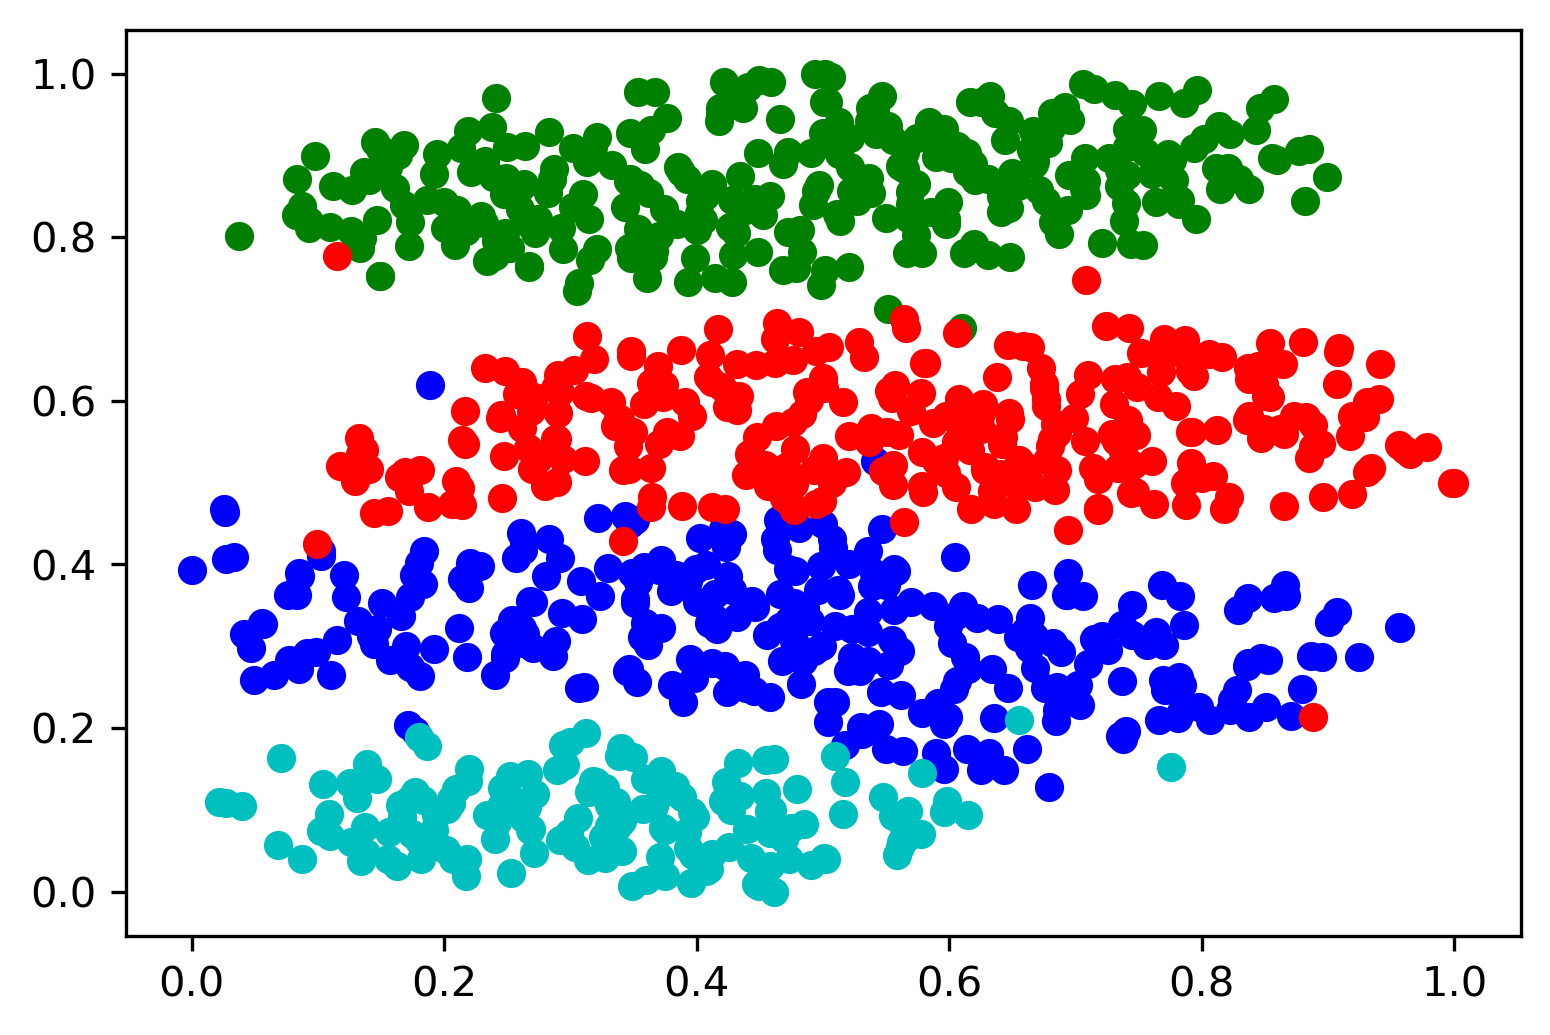

In [9]:
x_min, x_max = X_embedded.min(0), X_embedded.max(0)
X_norm = (X_embedded - x_min) / (x_max - x_min)  # 归一化

for i in range(X_norm.shape[0]):
    plt.scatter(X_norm[i, 0], X_norm[i, 1],c=color[i//283])
#     plt.text(X_norm[i, 0], X_norm[i, 1],s=symbols[i],fontsize=4)
# plt.xlim(0.5,1.0)
# plt.ylim(0.0,0.8)